# Pandas In Action (part 2)

This is the second part of Pandas in Action, using the same flights dataset.

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns #a better plotting tool built on top of matplotlib
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')


In [80]:
#keep the plotting inline
%matplotlib inline

In [81]:
flights = pd.read_csv("ny-flights.csv.gz",
                      parse_dates=["fl_date", "arr", "dep"],
                      dtype={'airline_id': object, 'fl_num':object})


In [82]:
#What does the "non-null" mean?
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
fl_date           20817 non-null datetime64[ns]
unique_carrier    20817 non-null object
airline_id        20817 non-null object
tail_num          20512 non-null object
fl_num            20817 non-null object
origin            20817 non-null object
dest              20817 non-null object
dep_time          18462 non-null float64
dep_delay         18462 non-null float64
arr_time          18412 non-null float64
arr_delay         18383 non-null float64
cancelled         20817 non-null float64
arr               18412 non-null datetime64[ns]
dep               18462 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(5), object(6)
memory usage: 2.2+ MB


In [83]:
flights.info(null_counts = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
fl_date           datetime64[ns]
unique_carrier    object
airline_id        object
tail_num          object
fl_num            object
origin            object
dest              object
dep_time          float64
dep_delay         float64
arr_time          float64
arr_delay         float64
cancelled         float64
arr               datetime64[ns]
dep               datetime64[ns]
dtypes: datetime64[ns](3), float64(5), object(6)
memory usage: 2.2+ MB


## Understanding missing values

If a person does not have an AGE, we treat it as missing value.

If a flight does not have an ARR_TIME, it is a different kind of missing value. Missing ARR_TIME might mean the flight is cancelled? the flight crashed?

Then how do we count the null values?

In [84]:
#arr_time missing? how many rows have missing values?
sum(flights.arr_time.isna())

2405

In [85]:
#it's the same as total number of rows minus arr_time non-null count
flights.shape[0] - flights.arr_time.count()

2405

In [86]:
#can we just delete them? let's take a look:
flights[flights.arr_time.isna()].head(3)

fl_date unique_carrier airline_id tail_num fl_num origin dest  \
29  2014-01-01             AA      19805   N3EAAA    359    LGA  ORD   
31  2014-01-01             AA      19805   N542AA    371    LGA  ORD   
192 2014-01-01             B6      20409   N633JB    329    JFK  RSW   

     dep_time  dep_delay  arr_time  arr_delay  cancelled arr  \
29        NaN        NaN       NaN        NaN        1.0 NaT   
31        NaN        NaN       NaN        NaN        1.0 NaT   
192    2138.0       52.0       NaN        NaN        0.0 NaT   

                    dep  
29                  NaT  
31                  NaT  
192 2014-01-01 21:38:00

In [87]:
#arr_time is missing because it's cancelled! they are missing for a good reason!
#so we need to see how many 'not cancelled' flights have missing arr_time:
# != means NOT equal
flights[flights.arr_time.isna() & (flights.cancelled != 1)]

fl_date unique_carrier airline_id tail_num fl_num origin dest  \
192  2014-01-01             B6      20409   N633JB    329    JFK  RSW   
1030 2014-01-02             B6      20409   N760JB     89    JFK  SAN   
1193 2014-01-02             AA      19805   N3CYAA     67    JFK  SAN   
1287 2014-01-02             DL      19790   N908DE   2370    LGA  PBI   
1956 2014-01-03             US      20355   N961UW   2037    LGA  PHL   
3396 2014-01-05             WN      19393   N263WN    876    LGA  MDW   
3402 2014-01-05             WN      19393   N8602F   2639    LGA  STL   
6250 2014-01-10             WN      19393   N213WN   2141    BUF  BWI   
7140 2014-01-11             AA      19805   N3KAAA     67    JFK  SAN   
9052 2014-01-14             EV      20366   N707EV   5339    LGA  MSN   

      dep_time  dep_delay  arr_time  arr_delay  cancelled arr  \
192     2138.0       52.0       NaN        NaN        0.0 NaT   
1030    1759.0       79.0       NaN        NaN        0.0 NaT   
1193    1718.0       13.0       NaN        NaN        0.0 NaT   
1287    1837.0       42.0       NaN        NaN        0.0 NaT   
1956    1551.0       16.0       NaN        NaN        0.0 NaT   
3396     937.0        2.0       NaN        NaN        0.0 NaT   
3402    1311.0       41.0       NaN        NaN        0.0 NaT   
6250     844.0       29.0       NaN        NaN        0.0 NaT   
7140    1926.0      141.0       NaN        NaN        0.0 NaT   
9052    1510.0       71.0       NaN        NaN        0.0 NaT   

                     dep  
192  2014-01-01 21:38:00  
1030 2014-01-02 17:59:00  
1193 2014-01-02 17:18:00  
1287 2014-01-02 18:37:00  
1956 2014-01-03 15:51:00  
3396 2014-01-05 09:37:00  
3402 2014-01-05 13:11:00  
6250 2014-01-10 08:44:00  
7140 2014-01-11 19:26:00  
9052 2014-01-14 15:10:00

In [88]:
# & means logical 'and', | is logical 'or'
# this is just an example to show 'or' operator
flights[flights.arr_time.isna() | (flights.cancelled == 1)].head()

fl_date unique_carrier airline_id tail_num fl_num origin dest  \
29  2014-01-01             AA      19805   N3EAAA    359    LGA  ORD   
31  2014-01-01             AA      19805   N542AA    371    LGA  ORD   
192 2014-01-01             B6      20409   N633JB    329    JFK  RSW   
195 2014-01-01             B6      20409   N913JB   1103    JFK  SJU   
209 2014-01-01             B6      20409   N193JB    518    JFK  BOS   

     dep_time  dep_delay  arr_time  arr_delay  cancelled arr  \
29        NaN        NaN       NaN        NaN        1.0 NaT   
31        NaN        NaN       NaN        NaN        1.0 NaT   
192    2138.0       52.0       NaN        NaN        0.0 NaT   
195       NaN        NaN       NaN        NaN        1.0 NaT   
209       NaN        NaN       NaN        NaN        1.0 NaT   

                    dep  
29                  NaT  
31                  NaT  
192 2014-01-01 21:38:00  
195                 NaT  
209                 NaT

In [89]:
flights[flights.arr_time.isna() & (flights.cancelled != 1)].index

Int64Index([192, 1030, 1193, 1287, 1956, 3396, 3402, 6250, 7140, 9052], dtype='int64')

In [90]:
#It's scary that the flights have dep_time, but not arr_time? were they crashed???
#A more reasonable interpretation is "missing data", we can drop them from the dataset
cleaned_df = flights.drop(flights[flights.arr_time.isna() & (flights.cancelled != 1)].index)

In [91]:
#what happened? dropped from what?
cleaned_df.shape, flights.shape

((20807, 14), (20817, 14))

In [92]:
flights[flights.arr_time.isna() & (flights.cancelled != 1)]

fl_date unique_carrier airline_id tail_num fl_num origin dest  \
192  2014-01-01             B6      20409   N633JB    329    JFK  RSW   
1030 2014-01-02             B6      20409   N760JB     89    JFK  SAN   
1193 2014-01-02             AA      19805   N3CYAA     67    JFK  SAN   
1287 2014-01-02             DL      19790   N908DE   2370    LGA  PBI   
1956 2014-01-03             US      20355   N961UW   2037    LGA  PHL   
3396 2014-01-05             WN      19393   N263WN    876    LGA  MDW   
3402 2014-01-05             WN      19393   N8602F   2639    LGA  STL   
6250 2014-01-10             WN      19393   N213WN   2141    BUF  BWI   
7140 2014-01-11             AA      19805   N3KAAA     67    JFK  SAN   
9052 2014-01-14             EV      20366   N707EV   5339    LGA  MSN   

      dep_time  dep_delay  arr_time  arr_delay  cancelled arr  \
192     2138.0       52.0       NaN        NaN        0.0 NaT   
1030    1759.0       79.0       NaN        NaN        0.0 NaT   
1193    1718.0       13.0       NaN        NaN        0.0 NaT   
1287    1837.0       42.0       NaN        NaN        0.0 NaT   
1956    1551.0       16.0       NaN        NaN        0.0 NaT   
3396     937.0        2.0       NaN        NaN        0.0 NaT   
3402    1311.0       41.0       NaN        NaN        0.0 NaT   
6250     844.0       29.0       NaN        NaN        0.0 NaT   
7140    1926.0      141.0       NaN        NaN        0.0 NaT   
9052    1510.0       71.0       NaN        NaN        0.0 NaT   

                     dep  
192  2014-01-01 21:38:00  
1030 2014-01-02 17:59:00  
1193 2014-01-02 17:18:00  
1287 2014-01-02 18:37:00  
1956 2014-01-03 15:51:00  
3396 2014-01-05 09:37:00  
3402 2014-01-05 13:11:00  
6250 2014-01-10 08:44:00  
7140 2014-01-11 19:26:00  
9052 2014-01-14 15:10:00

In [93]:
#we deleted 10 rows(20807 vs 20817), but the original dataframe is unmodified.
#take a look at drop:
flights.drop?
#you can modify the origin dataframe by setting inplace=True


In [94]:
#by the way, isnull() is the same as isna()
sum(flights.arr_time.isna()),sum(flights.arr_time.isnull())

(2405, 2405)

In [95]:
#let modify the cleaned_df and see if it changes the flights df too
cleaned_df.iloc[0,1], flights.iloc[0,1]

('AA', 'AA')

In [96]:
cleaned_df.iloc[0,1] = 'XX'
cleaned_df.iloc[0,1], flights.iloc[0,1]

('XX', 'AA')

In [97]:
#this shows cleaned_df is a copy of flights
#let's restore the data
cleaned_df.iloc[0,1] = 'AA'


In [98]:
cleaned_df.shape,flights.shape

((20807, 14), (20817, 14))

In [99]:
#how different the cleaned_df and the original flights?
#Review: iloc is on the positional index, not the label-index
cleaned_df.iloc[20800:,]

fl_date unique_carrier airline_id tail_num fl_num origin dest  \
20810 2014-01-31             UA      19977   N502UA    841    JFK  LAX   
20811 2014-01-31             UA      19977   N37255   1206    LGA  DEN   
20812 2014-01-31             UA      19977   N54711   1253    ROC  ORD   
20813 2014-01-31             UA      19977   N77525   1429    LGA  CLE   
20814 2014-01-31             UA      19977   N37293   1456    LGA  IAH   
20815 2014-01-31             UA      19977   N24729   1457    LGA  IAH   
20816 2014-01-31             MQ      20398   N609MQ   3699    BUF  ORD   

       dep_time  dep_delay  arr_time  arr_delay  cancelled  \
20810    1443.0       -2.0    1813.0        9.0        0.0   
20811    1225.0       73.0    1543.0      121.0        0.0   
20812     801.0       -4.0     908.0        4.0        0.0   
20813    1522.0      -10.0    1649.0      -31.0        0.0   
20814     719.0       -6.0    1006.0      -20.0        0.0   
20815     852.0        7.0    1156.0       -6.0        0.0   
20816    1208.0      -12.0    1251.0      -19.0        0.0   

                      arr                 dep  
20810 2014-01-31 18:13:00 2014-01-31 14:43:00  
20811 2014-01-31 15:43:00 2014-01-31 12:25:00  
20812 2014-01-31 09:08:00 2014-01-31 08:01:00  
20813 2014-01-31 16:49:00 2014-01-31 15:22:00  
20814 2014-01-31 10:06:00 2014-01-31 07:19:00  
20815 2014-01-31 11:56:00 2014-01-31 08:52:00  
20816 2014-01-31 12:51:00 2014-01-31 12:08:00

In [100]:
flights.iloc[20806:,]

fl_date unique_carrier airline_id tail_num fl_num origin dest  \
20806 2014-01-31             UA      19977   N816UA    695    LGA  ORD   
20807 2014-01-31             UA      19977   N568UA    703    JFK  LAX   
20808 2014-01-31             UA      19977   N473UA    711    LGA  ORD   
20809 2014-01-31             UA      19977   N510UA    766    JFK  SFO   
20810 2014-01-31             UA      19977   N502UA    841    JFK  LAX   
20811 2014-01-31             UA      19977   N37255   1206    LGA  DEN   
20812 2014-01-31             UA      19977   N54711   1253    ROC  ORD   
20813 2014-01-31             UA      19977   N77525   1429    LGA  CLE   
20814 2014-01-31             UA      19977   N37293   1456    LGA  IAH   
20815 2014-01-31             UA      19977   N24729   1457    LGA  IAH   
20816 2014-01-31             MQ      20398   N609MQ   3699    BUF  ORD   

       dep_time  dep_delay  arr_time  arr_delay  cancelled  \
20806    2000.0        0.0    2148.0       10.0        0.0   
20807     831.0       -4.0    1204.0        4.0        0.0   
20808     850.0      -10.0    1014.0      -24.0        0.0   
20809    1152.0       -8.0    1523.0       -8.0        0.0   
20810    1443.0       -2.0    1813.0        9.0        0.0   
20811    1225.0       73.0    1543.0      121.0        0.0   
20812     801.0       -4.0     908.0        4.0        0.0   
20813    1522.0      -10.0    1649.0      -31.0        0.0   
20814     719.0       -6.0    1006.0      -20.0        0.0   
20815     852.0        7.0    1156.0       -6.0        0.0   
20816    1208.0      -12.0    1251.0      -19.0        0.0   

                      arr                 dep  
20806 2014-01-31 21:48:00 2014-01-31 20:00:00  
20807 2014-01-31 12:04:00 2014-01-31 08:31:00  
20808 2014-01-31 10:14:00 2014-01-31 08:50:00  
20809 2014-01-31 15:23:00 2014-01-31 11:52:00  
20810 2014-01-31 18:13:00 2014-01-31 14:43:00  
20811 2014-01-31 15:43:00 2014-01-31 12:25:00  
20812 2014-01-31 09:08:00 2014-01-31 08:01:00  
20813 2014-01-31 16:49:00 2014-01-31 15:22:00  
20814 2014-01-31 10:06:00 2014-01-31 07:19:00  
20815 2014-01-31 11:56:00 2014-01-31 08:52:00  
20816 2014-01-31 12:51:00 2014-01-31 12:08:00

In [101]:
cleaned_df.iloc[193:199,]

fl_date unique_carrier airline_id tail_num fl_num origin dest  \
194 2014-01-01             B6      20409   N524JB   1205    JFK  PDX   
195 2014-01-01             B6      20409   N913JB   1103    JFK  SJU   
196 2014-01-01             B6      20409   N178JB    395    HPN  MCO   
197 2014-01-01             B6      20409   N179JB     45    BUF  RSW   
198 2014-01-01             B6      20409   N179JB   1465    BUF  FLL   
199 2014-01-01             B6      20409   N184JB   2602    JFK  BUF   

     dep_time  dep_delay  arr_time  arr_delay  cancelled                 arr  \
194    2240.0      121.0     208.0      133.0        0.0 2014-01-01 02:08:00   
195       NaN        NaN       NaN        NaN        1.0                 NaT   
196    1028.0      -16.0    1326.0       -1.0        0.0 2014-01-01 13:26:00   
197     728.0       23.0    1040.0       30.0        0.0 2014-01-01 10:40:00   
198    1434.0       24.0    1741.0       27.0        0.0 2014-01-01 17:41:00   
199    1036.0       -4.0    1206.0        7.0        0.0 2014-01-01 12:06:00   

                    dep  
194 2014-01-01 22:40:00  
195                 NaT  
196 2014-01-01 10:28:00  
197 2014-01-01 07:28:00  
198 2014-01-01 14:34:00  
199 2014-01-01 10:36:00

In [102]:
cleaned_df.loc[193:199,]

fl_date unique_carrier airline_id tail_num fl_num origin dest  \
193 2014-01-01             B6      20409   N639JB   1099    LGA  MCO   
194 2014-01-01             B6      20409   N524JB   1205    JFK  PDX   
195 2014-01-01             B6      20409   N913JB   1103    JFK  SJU   
196 2014-01-01             B6      20409   N178JB    395    HPN  MCO   
197 2014-01-01             B6      20409   N179JB     45    BUF  RSW   
198 2014-01-01             B6      20409   N179JB   1465    BUF  FLL   
199 2014-01-01             B6      20409   N184JB   2602    JFK  BUF   

     dep_time  dep_delay  arr_time  arr_delay  cancelled                 arr  \
193     803.0       93.0    1100.0      101.0        0.0 2014-01-01 11:00:00   
194    2240.0      121.0     208.0      133.0        0.0 2014-01-01 02:08:00   
195       NaN        NaN       NaN        NaN        1.0                 NaT   
196    1028.0      -16.0    1326.0       -1.0        0.0 2014-01-01 13:26:00   
197     728.0       23.0    1040.0       30.0        0.0 2014-01-01 10:40:00   
198    1434.0       24.0    1741.0       27.0        0.0 2014-01-01 17:41:00   
199    1036.0       -4.0    1206.0        7.0        0.0 2014-01-01 12:06:00   

                    dep  
193 2014-01-01 08:03:00  
194 2014-01-01 22:40:00  
195                 NaT  
196 2014-01-01 10:28:00  
197 2014-01-01 07:28:00  
198 2014-01-01 14:34:00  
199 2014-01-01 10:36:00

## Understanding Duplicate data

Duplicate data: the same data in different format. 

Sometimes you want duplicate data, sometimes you don't

In [103]:
cleaned_df.columns

Index(['fl_date', 'unique_carrier', 'airline_id', 'tail_num', 'fl_num',
       'origin', 'dest', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay',
       'cancelled', 'arr', 'dep'],
      dtype='object')

In [104]:
# most like they are duplicate data
cleaned_df[['unique_carrier', 'airline_id']]

unique_carrier airline_id
0                 AA      19805
1                 AA      19805
2                 AA      19805
3                 AA      19805
4                 AA      19805
5                 AA      19805
6                 AA      19805
7                 AA      19805
8                 AA      19805
9                 AA      19805
10                AA      19805
11                AA      19805
12                AA      19805
13                AA      19805
14                AA      19805
15                AA      19805
16                AA      19805
17                AA      19805
18                AA      19805
19                AA      19805
20                AA      19805
21                AA      19805
22                AA      19805
23                AA      19805
24                AA      19805
25                AA      19805
26                AA      19805
27                AA      19805
28                AA      19805
29                AA      19805
...              ...        ...
20787             UA      19977
20788             UA      19977
20789             UA      19977
20790             UA      19977
20791             UA      19977
20792             UA      19977
20793             UA      19977
20794             UA      19977
20795             UA      19977
20796             UA      19977
20797             UA      19977
20798             MQ      20398
20799             UA      19977
20800             UA      19977
20801             UA      19977
20802             UA      19977
20803             UA      19977
20804             UA      19977
20805             UA      19977
20806             UA      19977
20807             UA      19977
20808             UA      19977
20809             UA      19977
20810             UA      19977
20811             UA      19977
20812             UA      19977
20813             UA      19977
20814             UA      19977
20815             UA      19977
20816             MQ      20398

[20807 rows x 2 columns]

In [105]:
#AA is better to understand the 19805, so let's drop it,
## NOTE: I'm using inplace=True
cleaned_df.drop('airline_id', axis='columns', inplace=True)

In [106]:
cleaned_df.columns

Index(['fl_date', 'unique_carrier', 'tail_num', 'fl_num', 'origin', 'dest',
       'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'cancelled', 'arr',
       'dep'],
      dtype='object')

In [107]:
cleaned_df.head()

fl_date unique_carrier tail_num fl_num origin dest  dep_time  dep_delay  \
0 2014-01-01             AA   N338AA      1    JFK  LAX     914.0       14.0   
1 2014-01-01             AA   N335AA      3    JFK  LAX    1157.0       -3.0   
2 2014-01-01             AA   N327AA     21    JFK  LAX    1902.0        2.0   
3 2014-01-01             AA   N3EHAA     29    LGA  PBI     722.0       -8.0   
4 2014-01-01             AA   N319AA    117    JFK  LAX    1347.0        2.0   

   arr_time  arr_delay  cancelled                 arr                 dep  
0    1238.0       13.0        0.0 2014-01-01 12:38:00 2014-01-01 09:14:00  
1    1523.0       13.0        0.0 2014-01-01 15:23:00 2014-01-01 11:57:00  
2    2224.0        9.0        0.0 2014-01-01 22:24:00 2014-01-01 19:02:00  
3    1014.0      -26.0        0.0 2014-01-01 10:14:00 2014-01-01 07:22:00  
4    1706.0        1.0        0.0 2014-01-01 17:06:00 2014-01-01 13:47:00

## Get some quick answers for questions

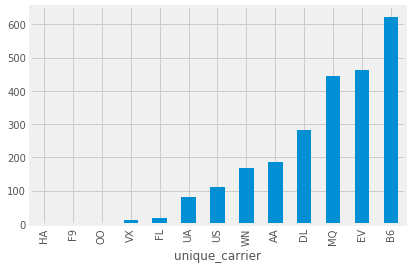

In [108]:
# which airline has the most cancelled flighs?

cleaned_df.groupby('unique_carrier')['cancelled'].sum().sort_values().plot(kind='bar');

In [109]:
cleaned_df.groupby('unique_carrier')['cancelled'].sum().sort_values()

unique_carrier
HA      0.0
F9      1.0
OO      1.0
VX     12.0
FL     19.0
UA     81.0
US    111.0
WN    169.0
AA    186.0
DL    284.0
MQ    444.0
EV    464.0
B6    623.0
Name: cancelled, dtype: float64

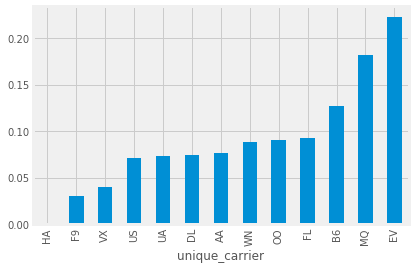

In [110]:
#a more meaningful question is on the likelyhood of a flight being cancelled

cleaned_df.groupby('unique_carrier')['cancelled'].mean().sort_values().plot.bar();




In [111]:
#Print the first value in each group
cleaned_df.groupby('unique_carrier').first()

fl_date tail_num fl_num origin dest  dep_time  dep_delay  \
unique_carrier                                                               
AA             2014-01-01   N338AA      1    JFK  LAX     914.0       14.0   
B6             2014-01-01   N318JB    115    SYR  JFK     720.0       90.0   
DL             2014-01-01   N930DL     61    LGA  ATL    1810.0       10.0   
EV             2014-01-01   N14977   3259    HPN  ORD     731.0       -5.0   
F9             2014-01-01   N209FR    507    LGA  DEN    1804.0       35.0   
FL             2014-01-01   N952AT     63    LGA  ATL    1146.0       -5.0   
HA             2014-01-01   N382HA     51    JFK  HNL     906.0        6.0   
MQ             2014-01-01   N521MQ   2789    LGA  CLT    1328.0        8.0   
OO             2014-01-07   N732SK   6258    SYR  ORD    1721.0       49.0   
UA             2014-01-01   N413UA    255    LGA  ORD     824.0        0.0   
US             2014-01-01   N546UW    629    JFK  PHX    1624.0       -6.0   
VX             2014-01-01   N361VA     11    JFK  SFO     730.0        0.0   
WN             2014-01-01   N625SW    613    ALB  BWI    1502.0       17.0   

                arr_time  arr_delay  cancelled                 arr  \
unique_carrier                                                       
AA                1238.0       13.0        0.0 2014-01-01 12:38:00   
B6                 808.0       55.0        0.0 2014-01-01 08:08:00   
DL                2054.0       10.0        0.0 2014-01-01 20:54:00   
EV                 940.0       31.0        0.0 2014-01-01 09:40:00   
F9                2047.0       47.0        0.0 2014-01-01 20:47:00   
FL                1409.0      -10.0        0.0 2014-01-01 14:09:00   
HA                1503.0       -7.0        0.0 2014-01-01 15:03:00   
MQ                1522.0        2.0        0.0 2014-01-01 15:22:00   
OO                1834.0       47.0        1.0 2014-01-08 18:34:00   
UA                1006.0        8.0        0.0 2014-01-01 10:06:00   
US                1932.0      -39.0        0.0 2014-01-01 19:32:00   
VX                1056.0      -14.0        0.0 2014-01-01 10:56:00   
WN                1615.0       15.0        0.0 2014-01-01 16:15:00   

                               dep  
unique_carrier                      
AA             2014-01-01 09:14:00  
B6             2014-01-01 07:20:00  
DL             2014-01-01 18:10:00  
EV             2014-01-01 07:31:00  
F9             2014-01-01 18:04:00  
FL             2014-01-01 11:46:00  
HA             2014-01-01 09:06:00  
MQ             2014-01-01 13:28:00  
OO             2014-01-08 17:21:00  
UA             2014-01-01 08:24:00  
US             2014-01-01 16:24:00  
VX             2014-01-01 07:30:00  
WN             2014-01-01 15:02:00

In [112]:
cleaned_df.groupby('unique_carrier').last()

fl_date tail_num fl_num origin dest  dep_time  dep_delay  \
unique_carrier                                                               
AA             2014-01-31   N3ENAA   2335    LGA  MIA     859.0       -1.0   
B6             2014-01-31   N794JB    423    JFK  LAX    1659.0       24.0   
DL             2014-01-31   N995DL   2545    ALB  ATL     607.0       -3.0   
EV             2014-01-31   N834AS   5736    LGA  IAD    1008.0       -4.0   
F9             2014-01-31   N208FR    143    LGA  DEN    1716.0      -13.0   
FL             2014-01-31   N932AT   1516    LGA  ATL    1741.0       12.0   
HA             2014-01-31   N380HA     51    JFK  HNL     857.0       -3.0   
MQ             2014-01-31   N609MQ   3699    BUF  ORD    1208.0      -12.0   
OO             2014-01-29   N905SW   5269    SYR  ORD    1652.0       20.0   
UA             2014-01-31   N24729   1457    LGA  IAH     852.0        7.0   
US             2014-01-31   N716UW   2197    LGA  DCA    2045.0      -15.0   
VX             2014-01-31   N626VA    415    JFK  LAX    1950.0      -10.0   
WN             2014-01-31   N786SW   2677    ROC  TPA    1139.0       -1.0   

                arr_time  arr_delay  cancelled                 arr  \
unique_carrier                                                       
AA                1209.0      -11.0        0.0 2014-01-31 12:09:00   
B6                2106.0       63.0        0.0 2014-01-31 21:06:00   
DL                 840.0      -25.0        0.0 2014-01-31 08:40:00   
EV                1116.0      -21.0        0.0 2014-01-31 11:16:00   
F9                2015.0       15.0        0.0 2014-01-31 20:15:00   
FL                2002.0      -12.0        0.0 2014-01-31 20:02:00   
HA                1515.0        5.0        0.0 2014-01-31 15:15:00   
MQ                1251.0      -19.0        0.0 2014-01-31 12:51:00   
OO                1800.0       13.0        0.0 2014-01-29 18:00:00   
UA                1156.0       -6.0        0.0 2014-01-31 11:56:00   
US                2207.0       -8.0        0.0 2014-01-31 22:07:00   
VX                2332.0        7.0        0.0 2014-01-31 23:32:00   
WN                1426.0       -9.0        0.0 2014-01-31 14:26:00   

                               dep  
unique_carrier                      
AA             2014-01-31 08:59:00  
B6             2014-01-31 16:59:00  
DL             2014-01-31 06:07:00  
EV             2014-01-31 10:08:00  
F9             2014-01-31 17:16:00  
FL             2014-01-31 17:41:00  
HA             2014-01-31 08:57:00  
MQ             2014-01-31 12:08:00  
OO             2014-01-29 16:52:00  
UA             2014-01-31 08:52:00  
US             2014-01-31 20:45:00  
VX             2014-01-31 19:50:00  
WN             2014-01-31 11:39:00

In [113]:
cleaned_df.groupby('unique_carrier').groups.keys()

dict_keys(['AA', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN'])

In [114]:
cleaned_df.groupby('unique_carrier').groups['AA']

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            20178, 20179, 20180, 20181, 20182, 20183, 20184, 20185, 20346,
            20347],
           dtype='int64', length=2425)

In [115]:
cleaned_df.groupby('unique_carrier')['cancelled'].count() #count the values in the column, all values,not just 1(cancelled)

unique_carrier
AA    2425
B6    4900
DL    3802
EV    2079
F9      33
FL     206
HA      29
MQ    2434
OO      11
UA    1106
US    1567
VX     301
WN    1914
Name: cancelled, dtype: int64

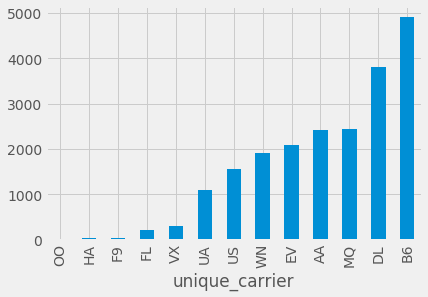

In [129]:
#HA is the best, but maybe it doesn't have enough flights, so the result might be irrelevant:
#let's count how many flights each airline has:
cleaned_df.groupby('unique_carrier').size().sort_values().plot(kind='bar');

In [117]:
cleaned_df.groupby('unique_carrier').size().sort_values()

unique_carrier
OO      11
HA      29
F9      33
FL     206
VX     301
UA    1106
US    1567
WN    1914
EV    2079
AA    2425
MQ    2434
DL    3802
B6    4900
dtype: int64

In [118]:
## arr_delay: what's the average?
cleaned_df.arr_delay.mean()


21.38073219822662

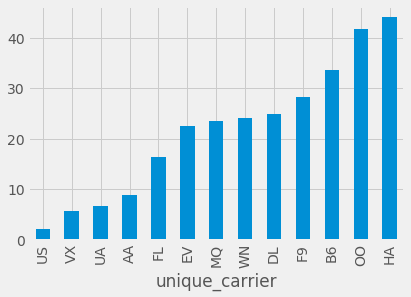

In [127]:
##what's average for each airline?
cleaned_df.groupby('unique_carrier')['arr_delay'].mean().sort_values().plot.bar()

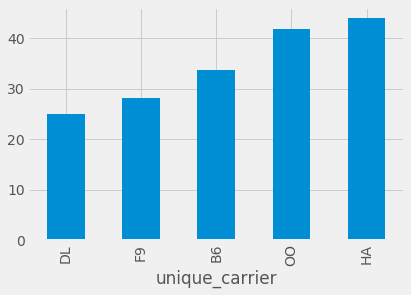

In [122]:
#what if there are too many airlines to display? how to show the top 5?
cleaned_df.groupby('unique_carrier')['arr_delay'].mean().sort_values()[-5:].plot.bar();

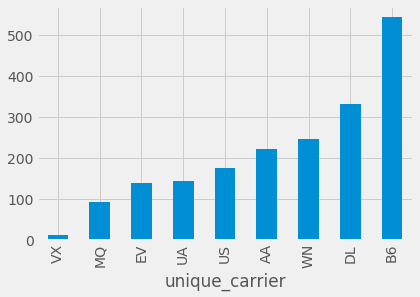

In [121]:
#which airline has more early flights, like earlier than 6:00am?

cleaned_df[cleaned_df.dep.dt.hour <= 6].groupby('unique_carrier').size().sort_values().plot.bar()